In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


In [2]:
AllPerformace = []

In [3]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = AdaBoostClassifier(random_state= 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['AdaBoost', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.63
Average Cross-Validation Precision: 0.73
Average Cross-Validation Recall: 0.63
Average Cross-Validation AUC-ROC: 0.87
Average Cross-Validation F1-Score: 0.64
Average Cross-Validation MCC-Score: 0.53


In [4]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = tree.DecisionTreeClassifier(random_state = 0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['DT', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.87
Average Cross-Validation Precision: 0.87
Average Cross-Validation Recall: 0.87
Average Cross-Validation AUC-ROC: 0.90
Average Cross-Validation F1-Score: 0.87
Average Cross-Validation MCC-Score: 0.83


In [5]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = GradientBoostingClassifier(random_state=0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['GBM', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.99
Average Cross-Validation Precision: 0.99
Average Cross-Validation Recall: 0.99
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.99
Average Cross-Validation MCC-Score: 0.98


In [6]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = KNeighborsClassifier()
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['KNN', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.84
Average Cross-Validation Precision: 0.88
Average Cross-Validation Recall: 0.84
Average Cross-Validation AUC-ROC: 0.96
Average Cross-Validation F1-Score: 0.82
Average Cross-Validation MCC-Score: 0.81


In [7]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = MLPClassifier(early_stopping=True,random_state=0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['MLP', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.98
Average Cross-Validation Precision: 0.98
Average Cross-Validation Recall: 0.98
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.98
Average Cross-Validation MCC-Score: 0.97


In [8]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = GaussianNB()
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['NB', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.90
Average Cross-Validation Precision: 0.91
Average Cross-Validation Recall: 0.90
Average Cross-Validation AUC-ROC: 0.99
Average Cross-Validation F1-Score: 0.89
Average Cross-Validation MCC-Score: 0.87


In [9]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = RandomForestClassifier(random_state=0)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['RF', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 1.00
Average Cross-Validation Precision: 1.00
Average Cross-Validation Recall: 1.00
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 1.00
Average Cross-Validation MCC-Score: 1.00


In [10]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = svm.SVC(probability=True)
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['SVM', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 1.00
Average Cross-Validation Precision: 1.00
Average Cross-Validation Recall: 1.00
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 1.00
Average Cross-Validation MCC-Score: 1.00


In [11]:
df = read_csv(r"D:\multiomics\Data\processed\reduced\cnv_snv_meth_mRNA_miRNA_rppa.csv")
data = df.values
X, y = data[:, 1:-1], data[:, -1]
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))
#oversampling
oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(X, y)
# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=False)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

for train_index, val_index in kfold.split(X, y):
    train_data, val_data = X[train_index], X[val_index]
    train_labels, val_labels = y[train_index], y[val_index]
    
    random.seed(0)
    model = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)
    eval_set = [(val_data, val_labels)]
    model.fit(train_data, train_labels)
    
    val_pred = model.predict(val_data)
    preds_proba = model.predict_proba(val_data)


    # Calculate metrics
    accuracy = accuracy_score(val_labels, val_pred )
    precision = precision_score(val_labels, val_pred , average='macro')
    recall = recall_score (val_labels, val_pred, average='macro')
    f1 = f1_score(val_labels, val_pred, average='macro')
    mcc = matthews_corrcoef(val_labels, val_pred)
    auc = roc_auc_score(val_labels,preds_proba,multi_class="ovr")

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    auc_scores.append(auc)
    f1_scores.append(f1)
    mcc_scores.append(mcc)
# Print the average metrics across all folds
print("Average Cross-Validation Accuracy: %.2f" % np.mean(accuracy_scores))
print("Average Cross-Validation Precision: %.2f" % np.mean(precision_scores))
print("Average Cross-Validation Recall: %.2f" % np.mean(recall_scores))
print("Average Cross-Validation AUC-ROC: %.2f" % np.mean(auc))
print("Average Cross-Validation F1-Score: %.2f" % np.mean(f1_scores))
print("Average Cross-Validation MCC-Score: %.2f" % np.mean(mcc_scores))

performance = ['xGB', np.mean(accuracy_scores), np.mean(auc),np.mean(precision_scores),np.mean(recall_scores),np.mean(f1_scores),np.mean(mcc_scores)]
AllPerformace.append(performance)
accuracy_scores = []
precision_scores = []
auc_scores = []
recall_scores = []
f1_scores = []
mcc_scores = []

Average Cross-Validation Accuracy: 0.99
Average Cross-Validation Precision: 0.99
Average Cross-Validation Recall: 0.99
Average Cross-Validation AUC-ROC: 1.00
Average Cross-Validation F1-Score: 0.99
Average Cross-Validation MCC-Score: 0.99


In [12]:
AllPerformace = pd.DataFrame(AllPerformace,columns = ['Model','Accuracy','AUC-ROC','Precision','Recall','F1','MCC'])

In [13]:
AllPerformace.to_csv('10ModelsTreatmentWithSmote.csv', index=False)


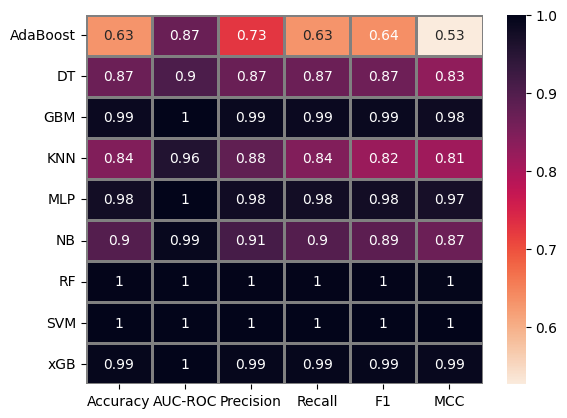

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
models = AllPerformace.iloc[:,0]
AllPerformace = AllPerformace.iloc[:,1:11]
sns.heatmap(AllPerformace, 
            xticklabels= AllPerformace.columns, 
            yticklabels= models,
            cmap='rocket_r',
            linewidth=1,
            linecolor='gray',annot=True
           )

plt.savefig('10ModelsTreatmentWithSmote.jpg',dpi=600,bbox_inches = 'tight');